In [1]:
# 0) IMPORTS Y CONFIG
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

In [5]:
# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DATASETS/DIABETES/diabetes.csv")
# Mostrar las primeras filas
display(df.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# 1.1) Info general, describe, nulos y duplicados
buf = io.StringIO()
df.info(buf=buf)
print("=== INFO DEL DATAFRAME ===")
print(buf.getvalue())

print("\n=== DESCRIPCIÓN ESTADÍSTICA ===")
display(df.describe(include="all"))

print("\n=== NULOS Y DUPLICADOS ===")
print("Nulos por columna:\n", df.isna().sum())
print("Duplicados:", df.duplicated().sum())


=== INFO DEL DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


=== DESCRIPCIÓN ESTADÍSTICA ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



=== NULOS Y DUPLICADOS ===
Nulos por columna:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Duplicados: 0


In [6]:
# 1.2) Columnas con ceros no fisiológicos (a reemplazar en preprocesamiento)
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("=== CONTEO DE CEROS EN COLUMNAS CLAVE ===")
print((df[invalid_zero_cols] == 0).sum())


=== CONTEO DE CEROS EN COLUMNAS CLAVE ===
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


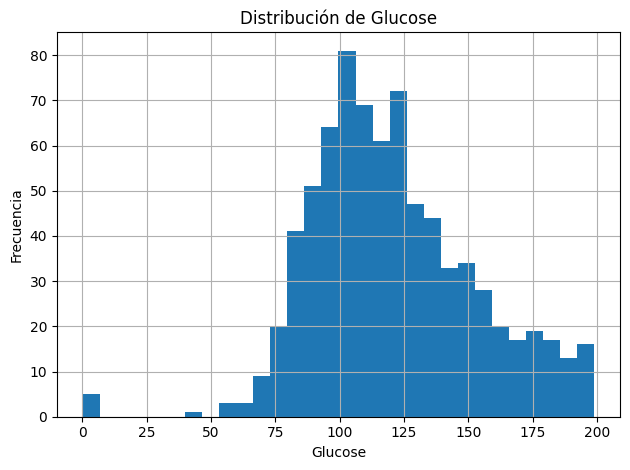

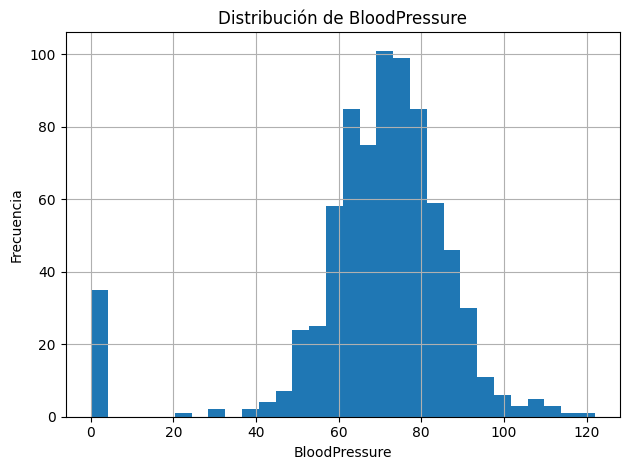

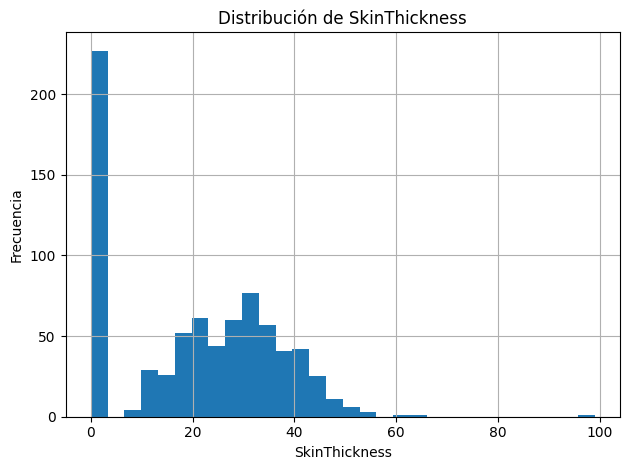

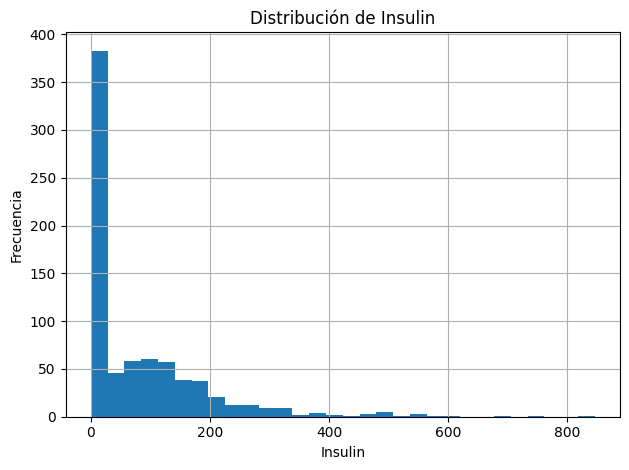

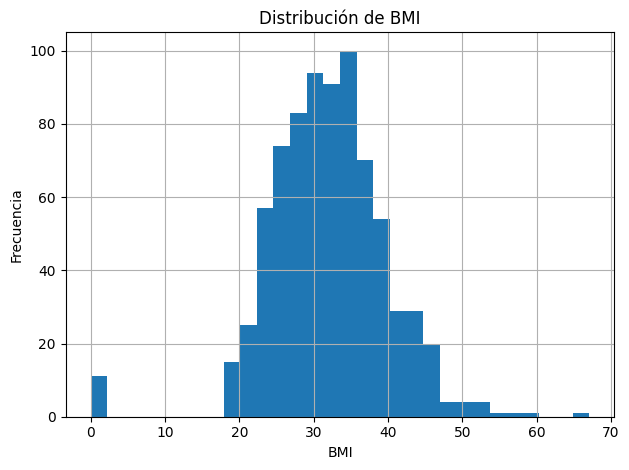

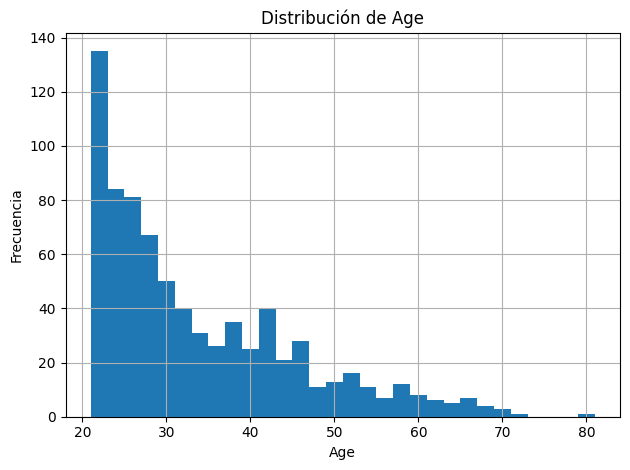

In [7]:
# 1.3) Distribuciones básicas
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


In [8]:
# 2.1) Reemplazar ceros inválidos por NaN para imputar
df_clean = df.copy()
print("Ceros antes de reemplazar -> NaN:")
print((df_clean[invalid_zero_cols] == 0).sum())

df_clean[invalid_zero_cols] = df_clean[invalid_zero_cols].replace(0, np.nan)
print("\nNulos después del reemplazo:")
print(df_clean[invalid_zero_cols].isna().sum())


Ceros antes de reemplazar -> NaN:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Nulos después del reemplazo:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [9]:
# 2.2) Imputación por MEDIANA (robusta a outliers)
for col in invalid_zero_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Nulos tras imputación (deberían ser 0):")
print(df_clean[invalid_zero_cols].isna().sum())


Nulos tras imputación (deberían ser 0):
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


/tmp/ipython-input-2050782244.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [10]:
# 2.3) Eliminar outliers con IQR en 'Insulin' y 'SkinThickness'
def remove_outliers_iqr(dataframe, columns, factor=1.5):
    mask = pd.Series(True, index=dataframe.index)
    for c in columns:
        q1 = dataframe[c].quantile(0.25)
        q3 = dataframe[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - factor * iqr
        upper = q3 + factor * iqr
        mask &= dataframe[c].between(lower, upper)
    removed = len(dataframe) - mask.sum()
    return dataframe[mask].copy(), removed

rows_before = len(df_clean)
df_clean, removed_rows = remove_outliers_iqr(df_clean, ["Insulin", "SkinThickness"], factor=1.5)
rows_after = len(df_clean)

print(f"Outliers removidos: {removed_rows} | Filas antes: {rows_before} | Filas después: {rows_after}")


Outliers removidos: 362 | Filas antes: 768 | Filas después: 406


In [11]:
# 2.4) Eliminar duplicados por si acaso
dup_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates().copy()
dup_after = df_clean.duplicated().sum()
print(f"Duplicados antes: {dup_before} | Duplicados después: {dup_after}")


Duplicados antes: 0 | Duplicados después: 0


In [12]:
# 3) Definir X (features) e y (etiqueta)
X = df_clean.drop(columns=["Outcome"])
y = df_clean["Outcome"].astype(int)

# Split estratificado 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Shapes -> X_train:", X_train.shape, "| X_test:", X_test.shape)
print("Proporción clase positiva (train):", y_train.mean().round(3))
print("Proporción clase positiva (test):", y_test.mean().round(3))


Shapes -> X_train: (324, 8) | X_test: (82, 8)
Proporción clase positiva (train): 0.373
Proporción clase positiva (test): 0.366


In [13]:
# 3.1) Escalamiento para modelos sensibles a escala (LR y KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [14]:
# Regresión Logística
lr = LogisticRegression(max_iter=1000, solver="liblinear")
lr.fit(X_train_scaled, y_train)

# Random Forest (no requiere escalado)
rf = RandomForestClassifier(
    n_estimators=300, random_state=42, class_weight="balanced"
)
rf.fit(X_train, y_train)

# KNN (con datos escalados)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

print("Modelos entrenados: LR, RF, KNN")


Modelos entrenados: LR, RF, KNN


In [16]:
# Predicciones + probabilidades
y_pred_lr  = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

y_pred_rf  = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

y_pred_knn  = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]


In [17]:
# Función de métricas
def evaluate_model(y_true, y_pred, y_proba):
    return {
        "Accuracy":  accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall":    recall_score(y_true, y_pred, zero_division=0),
        "F1":        f1_score(y_true, y_pred, zero_division=0),
        "ROC_AUC":   roc_auc_score(y_true, y_proba),
    }

m_lr  = evaluate_model(y_test, y_pred_lr,  y_proba_lr)
m_rf  = evaluate_model(y_test, y_pred_rf,  y_proba_rf)
m_knn = evaluate_model(y_test, y_pred_knn, y_proba_knn)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, digits=3))
print("Matriz de confusión (LR):\n", confusion_matrix(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=3))
print("Matriz de confusión (RF):\n", confusion_matrix(y_test, y_pred_rf))

print("\n=== KNN (k=7) ===")
print(classification_report(y_test, y_pred_knn, digits=3))
print("Matriz de confusión (KNN):\n", confusion_matrix(y_test, y_pred_knn))

pd.DataFrame([m_lr, m_rf, m_knn], index=["LogisticRegression", "RandomForest", "KNN"]).round(4)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.804     0.865     0.833        52
           1      0.731     0.633     0.679        30

    accuracy                          0.780        82
   macro avg      0.767     0.749     0.756        82
weighted avg      0.777     0.780     0.777        82

Matriz de confusión (LR):
 [[45  7]
 [11 19]]

=== Random Forest ===
              precision    recall  f1-score   support

           0      0.815     0.846     0.830        52
           1      0.714     0.667     0.690        30

    accuracy                          0.780        82
   macro avg      0.765     0.756     0.760        82
weighted avg      0.778     0.780     0.779        82

Matriz de confusión (RF):
 [[44  8]
 [10 20]]

=== KNN (k=7) ===
              precision    recall  f1-score   support

           0      0.800     0.846     0.822        52
           1      0.704     0.633     0.667        30

    accuracy        

,Accuracy,Precision,Recall,F1,ROC_AUC
LogisticRegression,0.7805,0.7308,0.6333,0.6786,0.8532
RandomForest,0.7805,0.7143,0.6667,0.6897,0.8487
KNN,0.7683,0.7037,0.6333,0.6667,0.8410


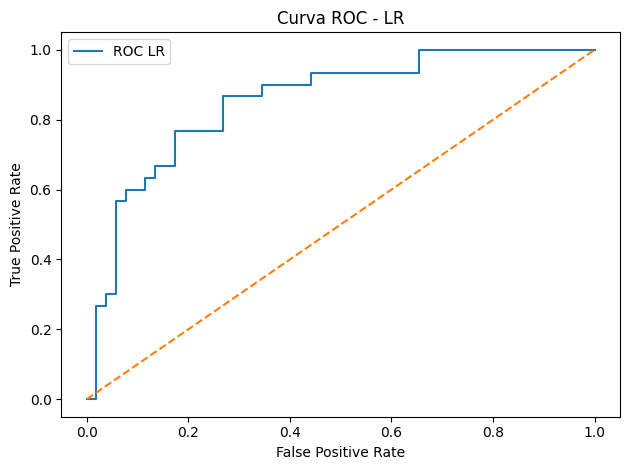

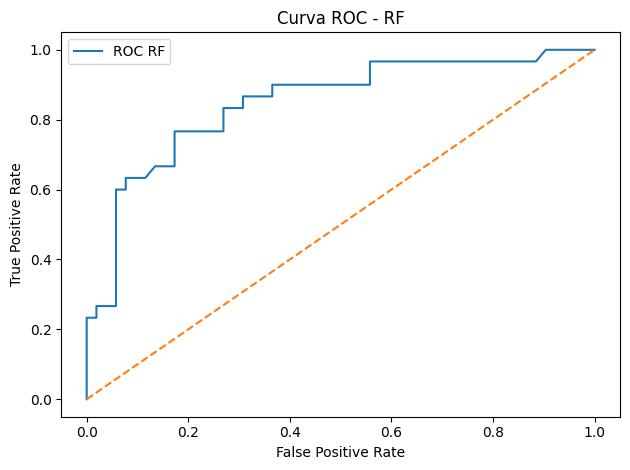

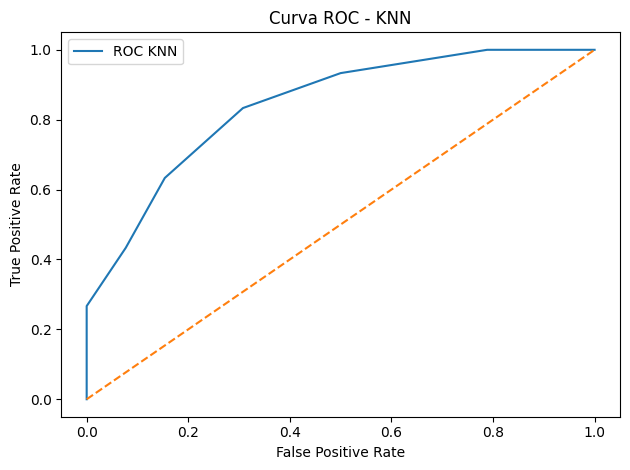

In [18]:
# Curvas ROC (una figura por modelo)
for (name, y_proba) in [("LR", y_proba_lr), ("RF", y_proba_rf), ("KNN", y_proba_knn)]:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC {name}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title(f"Curva ROC - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [19]:
# Elegir el mejor por ROC_AUC y guardar CSV con y_true, y_pred, y_proba
scores = {"LR": m_lr["ROC_AUC"], "RF": m_rf["ROC_AUC"], "KNN": m_knn["ROC_AUC"]}
best_name = max(scores, key=scores.get)
print("Mejor modelo según ROC_AUC:", best_name, "->", scores[best_name])

if best_name == "LR":
    best_pred, best_proba = y_pred_lr, y_proba_lr
elif best_name == "RF":
    best_pred, best_proba = y_pred_rf, y_proba_rf
else:
    best_pred, best_proba = y_pred_knn, y_proba_knn

pred_df = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": best_pred,
    "y_proba": best_proba
})
pred_df["model"] = best_name

pred_df.to_csv("diabetes_predictions.csv", index=False)
print("Predicciones guardadas en: diabetes_predictions.csv")


Mejor modelo según ROC_AUC: LR -> 0.8532051282051282
Predicciones guardadas en: diabetes_predictions.csv
